# Capstone Project - Predict House Sale Prices

## Source of the Dataset: Kaggle Competition
## Origin of the Dataset: Ames Housing Dataset
## Challenge: The challenge of this project is the dataset contains many variables. Hence, extensive data cleaning is needed before starting the data analysis process.
## The followings are the brief description of the data fields in the dataset:
- 1stFlrSF:	 First Floor square feet
- 2ndFlrSF:	 Second floor square feet
- 3SsnPorch:	 Three season porch area in square feet
- Alley:	 Type of alley access
- BedroomAbvGr:	 Number of bedrooms above basement level
- BldgType:	 Type of dwelling
- BsmtCond:	 General condition of the basement
- BsmtExposure:	 Walkout or garden level basement walls
- BsmtFinSF1:	 Type 1 finished square feet
- BsmtFinSF2:	 Type 2 finished square feet
- BsmtFinType1:	 Quality of basement finished area
- BsmtFinType2:	 Quality of second finished area (if present)
- BsmtFullBath:	 Basement full bathrooms
- BsmtHalfBath:	 Basement half bathrooms
- BsmtQual:	 Height of the basement
- BsmtUnfSF:	 Unfinished square feet of basement area
- CentralAir:	 Central air conditioning
- Condition1:	 Proximity to main road or railroad
- Condition2:	 Proximity to main road or railroad (if a second is present)
- Electrical:	 Electrical system
- EnclosedPorch:	 Enclosed porch area in square feet
- ExterCond:	 Present condition of the material on the exterior
- Exterior1st:	 Exterior covering on house
- Exterior2nd:	 Exterior covering on house (if more than one material)
- ExterQual:	 Exterior material quality
- Fence:	 Fence quality
- FireplaceQu:	 Fireplace quality
- Fireplaces:	 Number of fireplaces
- Foundation:	 Type of foundation
- FullBath:	 Full bathrooms above grade
- Functional:	 Home functionality rating
- GarageArea:	 Size of garage in square feet
- GarageCars:	 Size of garage in car capacity
- GarageCond:	 Garage condition
- GarageFinish:	 Interior finish of the garage
- GarageQual:	 Garage quality
- GarageType:	 Garage location
- GarageYrBlt:	 Year garage was built
- GrLivArea:	 Above grade (ground) living area square feet
- HalfBath:	 Half baths above grade
- Heating:	 Type of heating
- HeatingQC:	 Heating quality and condition
- HouseStyle:	 Style of dwelling
- Id:	Observation Id
- KitchenAbvGr:	 Number of kitchens
- KitchenQual:	 Kitchen quality
- LandContour:	 Flatness of the property
- LandSlope:	 Slope of property
- LotArea:	 Lot size in square feet
- LotConfig:	 Lot configuration
- LotFrontage:	 Linear feet of street connected to property
- LotShape:	 General shape of property
- LowQualFinSF:	 Low quality finished square feet (all floors)
- MSSubClass:	 The building class
- MSZoning:	 The general zoning classification
- MasVnrArea:	 Masonry veneer area in square feet
- MasVnrType:	 Masonry veneer type
- MiscFeature:	 Miscellaneous feature not covered in other categories
- MiscVal:	 $Value of miscellaneous feature
- MoSold:	 Month Sold
- Neighborhood:	 Physical locations within Ames city limits
- OpenPorchSF:	 Open porch area in square feet
- OverallCond:	 Overall condition rating
- OverallQual:	 Overall material and finish quality
- PavedDrive:	 Paved driveway
- PoolArea:	 Pool area in square feet
- PoolQC:	 Pool quality
- RoofMatl:	 Roof material
- RoofStyle:	 Type of roof
- SaleCondition:	 Condition of sale
- SalePrice:	 the property's sale price in dollars. This is the target variable that you're trying to predict.
- SaleType:	 Type of sale
- ScreenPorch:	 Screen porch area in square feet
- Street:	 Type of road access
- TotRmsAbvGrd:	 Total rooms above grade (does not include bathrooms)
- TotalBsmtSF:	 Total square feet of basement area
- Utilities:	 Type of utilities available
- WoodDeckSF:	 Wood deck area in square feet
- YearBuilt:	 Original construction date
- YearRemodAdd:	 Remodel date
- YrSold:	 Year Sold

## 1. Data Exploration/Cleaning
- Checking null values
- Remove outliers

## 2. Features Selection 
- Filter Method - Correlation Matrix
- Wrapper Method - Recursive Method
- Embedded Method - XGBoost Feature Importance


## 3.	Models 
- Ridge Regression
- LASSO Regression
- Elastic Net Regression
- Decision Tree
- Random Forest
- XGBoost

## 4.	Models Evaluation
- RMSE (Root Mean Squred Error)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy import stats
from scipy.stats import norm


from sklearn.preprocessing import StandardScaler
from sklearn import ensemble, tree, linear_model
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor


from sklearn.feature_selection import RFECV

import timeit

import warnings
warnings.filterwarnings('ignore')

### Read the dataset

In [2]:
df=pd.read_csv('train.csv')

In [3]:
from IPython.display import display
pd.options.display.max_columns=None
df=df.reindex_axis(sorted(df.columns),axis=1)
df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706,0,GLQ,Unf,1,0,Gd,150,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,NaN,0,PConc,2,Typ,548,2,TA,RFn,TA,Attchd,2003.0,1710,1,GasA,Ex,2Story,1,1,Gd,Lvl,Gtl,8450,Inside,65.0,Reg,0,60,RL,196.0,BrkFace,NaN,0,2,CollgCr,61,5,7,Y,0,NaN,CompShg,Gable,Normal,208500,WD,0,Pave,8,856,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978,0,ALQ,Unf,0,1,Gd,284,Y,Feedr,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,NaN,TA,1,CBlock,2,Typ,460,2,TA,RFn,TA,Attchd,1976.0,1262,0,GasA,Ex,1Story,2,1,TA,Lvl,Gtl,9600,FR2,80.0,Reg,0,20,RL,0.0,None,NaN,0,5,Veenker,0,8,6,Y,0,NaN,CompShg,Gable,Normal,181500,WD,0,Pave,6,1262,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486,0,GLQ,Unf,1,0,Gd,434,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,608,2,TA,RFn,TA,Attchd,2001.0,1786,1,GasA,Ex,2Story,3,1,Gd,Lvl,Gtl,11250,Inside,68.0,IR1,0,60,RL,162.0,BrkFace,NaN,0,9,CollgCr,42,5,7,Y,0,NaN,CompShg,Gable,Normal,223500,WD,0,Pave,6,920,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216,0,ALQ,Unf,1,0,TA,540,Y,Norm,Norm,SBrkr,272,TA,TA,Wd Sdng,Wd Shng,NaN,Gd,1,BrkTil,1,Typ,642,3,TA,Unf,TA,Detchd,1998.0,1717,0,GasA,Gd,2Story,4,1,Gd,Lvl,Gtl,9550,Corner,60.0,IR1,0,70,RL,0.0,None,NaN,0,2,Crawfor,35,5,7,Y,0,NaN,CompShg,Gable,Abnorml,140000,WD,0,Pave,7,756,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655,0,GLQ,Unf,1,0,Gd,490,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,836,3,TA,RFn,TA,Attchd,2000.0,2198,1,GasA,Ex,2Story,5,1,Gd,Lvl,Gtl,14260,FR2,84.0,IR1,0,60,RL,350.0,BrkFace,NaN,0,12,NoRidge,84,5,8,Y,0,NaN,CompShg,Gable,Normal,250000,WD,0,Pave,9,1145,AllPub,192,2000,2000,2008


In [4]:
df.shape

(1460, 81)

### Remove "Id" from dataset

In [5]:
df=df.drop(columns=['Id'])

In [6]:
df.shape

(1460, 80)

In [7]:
df.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenAbvGr',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig',
       'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning',
       'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold',
       'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'PoolArea', 'PoolQC',

## 1. Data Exploration/Cleaning

### Checking NAs

In [8]:
null_cols=df.columns[df.isnull().any()]
print(df[null_cols].isnull().sum().sort_values(ascending=False))
print()
print("Number of variables with NaN value:",len(null_cols.values))

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageQual        81
GarageFinish      81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtFinType1      37
BsmtCond          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

Number of variables with NaN value: 19


### It looks like "PoolQC" has "NaN" value when "PoolArea" has "zero" value. 
### Let's check if the number of missing value in "PoolQC" is the same as the number of rows with zero value in "PoolArea"

In [9]:
df['PoolQC'].isnull().sum()

1453

In [10]:
len(df['PoolArea'][df['PoolArea']==0])

1453

### It turns out the number is the same. 
### We can go ahead and replace the "NaN" in "PoolQC" with "0"

In [11]:
df['PoolQC'].fillna(0,inplace=True)

In [12]:
len(df['PoolQC'][df['PoolQC']==0])

1453

In [13]:
null_cols=df.columns[df.isnull().any()]
dg=(df[null_cols].isnull().sum()/len(df)*100).sort_values(ascending=False)
dg

MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageType       5.547945
GarageQual       5.547945
GarageFinish     5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtQual         2.534247
BsmtFinType1     2.534247
BsmtCond         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

### Remove columns with more than 80% of missing values

In [14]:
df=df.drop(columns=['MiscFeature','Alley','Fence'])

In [15]:
df.shape

(1460, 77)

### Checking the rest of features with missing values

In [16]:
null_cols=df.columns[df.isnull().any()]
dg=(df[null_cols].isnull().sum()/len(df)*100).sort_values(ascending=False)
print(dg)
nullCol=dg.index.values
nullCol

FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageType       5.547945
GarageQual       5.547945
GarageFinish     5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtQual         2.534247
BsmtFinType1     2.534247
BsmtCond         2.534247
MasVnrType       0.547945
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64


array(['FireplaceQu', 'LotFrontage', 'GarageYrBlt', 'GarageType',
       'GarageQual', 'GarageFinish', 'GarageCond', 'BsmtFinType2',
       'BsmtExposure', 'BsmtQual', 'BsmtFinType1', 'BsmtCond',
       'MasVnrType', 'MasVnrArea', 'Electrical'], dtype=object)

### It looks like "FireplaceQu" has "NaN" value when "Fireplaces" has "zero" value. 
### Let's check if the number of missing value in "FireplaceQu" is the same as the number of rows with zero value in "Fireplaces"

In [17]:
df['FireplaceQu'].isnull().sum()

690

In [18]:
len(df.loc[df['Fireplaces']==0])

690

### It turns out the number is the same. 
### We can go ahead and replace the "NaN" in "FireplaceQu" with "0"

In [19]:
df['FireplaceQu'].fillna(0,inplace=True)

### Some Lot just does not have LotFronage.
### Change "NaN" value to "zero" in "LotFrontage"

In [20]:
df['LotFrontage'].fillna(0,inplace=True)

### Check if the number of "0" value is the same as the number "NaN" value

In [21]:
len(df['LotFrontage'][df['LotFrontage']==0])

259

### Double check all the missing values again 

In [22]:
null_cols=df.columns[df.isnull().any()]
df[null_cols].isnull().sum().sort_values(ascending=False)
dg=(df[null_cols].isnull().sum()/len(df)*100).sort_values(ascending=False)
dg

GarageYrBlt     5.547945
GarageType      5.547945
GarageQual      5.547945
GarageFinish    5.547945
GarageCond      5.547945
BsmtFinType2    2.602740
BsmtExposure    2.602740
BsmtQual        2.534247
BsmtFinType1    2.534247
BsmtCond        2.534247
MasVnrType      0.547945
MasVnrArea      0.547945
Electrical      0.068493
dtype: float64

### All the remaining variables have less than 6% of missing values.
### We will remove all the rows with any missing values.

In [23]:
df_miss=df.dropna()

In [24]:
df_miss.isnull().sum()

1stFlrSF         0
2ndFlrSF         0
3SsnPorch        0
BedroomAbvGr     0
BldgType         0
BsmtCond         0
BsmtExposure     0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtFinType1     0
BsmtFinType2     0
BsmtFullBath     0
BsmtHalfBath     0
BsmtQual         0
BsmtUnfSF        0
CentralAir       0
Condition1       0
Condition2       0
Electrical       0
EnclosedPorch    0
ExterCond        0
ExterQual        0
Exterior1st      0
Exterior2nd      0
FireplaceQu      0
Fireplaces       0
Foundation       0
FullBath         0
Functional       0
GarageArea       0
                ..
LotFrontage      0
LotShape         0
LowQualFinSF     0
MSSubClass       0
MSZoning         0
MasVnrArea       0
MasVnrType       0
MiscVal          0
MoSold           0
Neighborhood     0
OpenPorchSF      0
OverallCond      0
OverallQual      0
PavedDrive       0
PoolArea         0
PoolQC           0
RoofMatl         0
RoofStyle        0
SaleCondition    0
SalePrice        0
SaleType         0
ScreenPorch 

In [25]:
df_miss.shape

(1338, 77)

In [26]:
len(df)-len(df_miss)

122

### Checking the percentage of data removed

In [27]:
(len(df)-len(df_miss))/len(df)*100

8.356164383561644

## Convert all string categorical variables to ordinal categorical variables

In [28]:
cat_col=df_miss.select_dtypes(include=['object']).columns
cat_col

Index(['BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'BsmtQual', 'CentralAir', 'Condition1', 'Condition2', 'Electrical',
       'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'FireplaceQu',
       'Foundation', 'Functional', 'GarageCond', 'GarageFinish', 'GarageQual',
       'GarageType', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenQual',
       'LandContour', 'LandSlope', 'LotConfig', 'LotShape', 'MSZoning',
       'MasVnrType', 'Neighborhood', 'PavedDrive', 'PoolQC', 'RoofMatl',
       'RoofStyle', 'SaleCondition', 'SaleType', 'Street', 'Utilities'],
      dtype='object')

In [29]:
for item1 in cat_col:
    df_mean=pd.concat([df_miss[item1],df_miss['SalePrice']],axis=1)
    df_mean.head()

    g1=df_mean.groupby(item1).mean()
    g1

    df_g1=pd.DataFrame()
    df_g1=pd.DataFrame(g1)
    df_g1

    df_g2=df_g1.sort_values('SalePrice')
    df_g2

    df_g2.index

    g_col=df_g2.index.values

    df_miss[item1].value_counts()

    i=0
    for item2 in g_col:
        df_miss.loc[df_miss[item1]==item2,item1]=i
        i=i+1

In [30]:
df_miss[cat_col].dtypes

BldgType         int64
BsmtCond         int64
BsmtExposure     int64
BsmtFinType1     int64
BsmtFinType2     int64
BsmtQual         int64
CentralAir       int64
Condition1       int64
Condition2       int64
Electrical       int64
ExterCond        int64
ExterQual        int64
Exterior1st      int64
Exterior2nd      int64
FireplaceQu      int64
Foundation       int64
Functional       int64
GarageCond       int64
GarageFinish     int64
GarageQual       int64
GarageType       int64
Heating          int64
HeatingQC        int64
HouseStyle       int64
KitchenQual      int64
LandContour      int64
LandSlope        int64
LotConfig        int64
LotShape         int64
MSZoning         int64
MasVnrType       int64
Neighborhood     int64
PavedDrive       int64
PoolQC           int64
RoofMatl         int64
RoofStyle        int64
SaleCondition    int64
SaleType         int64
Street           int64
Utilities        int64
dtype: object

In [31]:
for item in cat_col:
    print(df_miss[item].value_counts())
    print()

4    1138
3     112
1      38
2      28
0      22
Name: BldgType, dtype: int64

2    1237
3      62
1      38
0       1
Name: BsmtCond, dtype: int64

0    887
2    213
3    127
1    111
Name: BsmtExposure, dtype: int64

5    402
4    392
3    209
1    141
0    125
2     69
Name: BsmtFinType1, dtype: int64

3    1176
2      53
1      46
0      32
5      19
4      12
Name: BsmtFinType2, dtype: int64

1    594
2    592
3    120
0     32
Name: BsmtQual, dtype: int64

1    1277
0      61
Name: CentralAir, dtype: int64

4    1162
2      63
0      43
3      26
7      19
1      10
8       8
6       5
5       2
Name: Condition1, dtype: int64

4    1324
2       5
6       2
1       2
0       2
7       1
5       1
3       1
Name: Condition2, dtype: int64

4    1242
3      76
2      17
1       2
0       1
Name: Electrical, dtype: int64

2    1183
1     137
0      16
3       2
Name: ExterCond, dtype: int64

1    803
2    477
3     51
0      7
Name: ExterQual, dtype: int64

10    486
6     211
3     

In [32]:
df_miss.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,3,4,2,0,706,0,5,3,1,0,2,150,1,4,4,4,0,2,2,10,12,1,0,4,2,5,548,2,4,1,2,4,2003.0,1710,1,3,4,6,1,2,1,0,8450,0,65.0,0,0,60,3,196.0,2,0,2,16,61,5,7,2,0,0,3,1,4,208500,4,0,1,8,856,1,0,2003,2003,2008
1,1262,0,0,3,4,2,3,978,0,3,3,0,1,2,284,1,2,4,4,0,2,1,3,3,3,1,1,2,5,460,2,4,1,2,4,1976.0,1262,0,3,4,5,1,1,1,0,9600,1,80.0,0,0,20,3,0.0,1,0,5,20,0,8,6,2,0,0,3,1,4,181500,4,0,1,6,1262,1,298,1976,1976,2007
2,920,866,0,3,4,2,1,486,0,5,3,1,0,2,434,1,4,4,4,0,2,2,10,12,3,1,4,2,5,608,2,4,1,2,4,2001.0,1786,1,3,4,6,1,2,1,0,11250,0,68.0,1,0,60,3,162.0,2,0,9,16,42,5,7,2,0,0,3,1,4,223500,4,0,1,6,920,1,0,2001,2002,2008
3,961,756,0,3,4,3,0,216,0,3,3,1,0,1,540,1,4,4,4,272,2,1,4,8,4,1,0,1,5,642,3,4,0,2,1,1998.0,1717,0,3,3,6,1,2,1,0,9550,2,60.0,1,0,70,3,0.0,1,0,2,17,35,5,7,2,0,0,3,1,2,140000,4,0,1,7,756,1,0,1915,1970,2006
4,1145,1053,0,4,4,2,2,655,0,5,3,1,0,2,490,1,4,4,4,0,2,2,10,12,3,1,4,2,5,836,3,4,1,2,4,2000.0,2198,1,3,4,6,1,2,1,0,14260,1,84.0,1,0,60,3,350.0,2,0,12,24,84,5,8,2,0,0,3,1,4,250000,4,0,1,9,1145,1,192,2000,2000,2008


## Start working on Outliers

In [33]:
df_miss.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,3,4,2,0,706,0,5,3,1,0,2,150,1,4,4,4,0,2,2,10,12,1,0,4,2,5,548,2,4,1,2,4,2003.0,1710,1,3,4,6,1,2,1,0,8450,0,65.0,0,0,60,3,196.0,2,0,2,16,61,5,7,2,0,0,3,1,4,208500,4,0,1,8,856,1,0,2003,2003,2008
1,1262,0,0,3,4,2,3,978,0,3,3,0,1,2,284,1,2,4,4,0,2,1,3,3,3,1,1,2,5,460,2,4,1,2,4,1976.0,1262,0,3,4,5,1,1,1,0,9600,1,80.0,0,0,20,3,0.0,1,0,5,20,0,8,6,2,0,0,3,1,4,181500,4,0,1,6,1262,1,298,1976,1976,2007
2,920,866,0,3,4,2,1,486,0,5,3,1,0,2,434,1,4,4,4,0,2,2,10,12,3,1,4,2,5,608,2,4,1,2,4,2001.0,1786,1,3,4,6,1,2,1,0,11250,0,68.0,1,0,60,3,162.0,2,0,9,16,42,5,7,2,0,0,3,1,4,223500,4,0,1,6,920,1,0,2001,2002,2008
3,961,756,0,3,4,3,0,216,0,3,3,1,0,1,540,1,4,4,4,272,2,1,4,8,4,1,0,1,5,642,3,4,0,2,1,1998.0,1717,0,3,3,6,1,2,1,0,9550,2,60.0,1,0,70,3,0.0,1,0,2,17,35,5,7,2,0,0,3,1,2,140000,4,0,1,7,756,1,0,1915,1970,2006
4,1145,1053,0,4,4,2,2,655,0,5,3,1,0,2,490,1,4,4,4,0,2,2,10,12,3,1,4,2,5,836,3,4,1,2,4,2000.0,2198,1,3,4,6,1,2,1,0,14260,1,84.0,1,0,60,3,350.0,2,0,12,24,84,5,8,2,0,0,3,1,4,250000,4,0,1,9,1145,1,192,2000,2000,2008


In [34]:
df_miss.dtypes

1stFlrSF           int64
2ndFlrSF           int64
3SsnPorch          int64
BedroomAbvGr       int64
BldgType           int64
BsmtCond           int64
BsmtExposure       int64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtFinType1       int64
BsmtFinType2       int64
BsmtFullBath       int64
BsmtHalfBath       int64
BsmtQual           int64
BsmtUnfSF          int64
CentralAir         int64
Condition1         int64
Condition2         int64
Electrical         int64
EnclosedPorch      int64
ExterCond          int64
ExterQual          int64
Exterior1st        int64
Exterior2nd        int64
FireplaceQu        int64
Fireplaces         int64
Foundation         int64
FullBath           int64
Functional         int64
GarageArea         int64
                  ...   
LotFrontage      float64
LotShape           int64
LowQualFinSF       int64
MSSubClass         int64
MSZoning           int64
MasVnrArea       float64
MasVnrType         int64
MiscVal            int64
MoSold             int64


## Remove out of inter-quartile range values from 'SalePrice'

In [35]:
Q1=df_miss['SalePrice'].quantile(0.25)
Q3=df_miss['SalePrice'].quantile(0.75)

IQR=Q3-Q1

upper=Q3+1.5*IQR
lower=Q1-1.5*IQR

df_miss=df_miss.drop(df_miss[(df_miss['SalePrice']<lower)|(df_miss['SalePrice']>upper)].index)

### Log(x+1) transformed the whole dataset

In [36]:
df_miss=np.log1p(df_miss)

In [37]:
df_miss.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,6.753438,6.751101,0.0,1.386294,1.609438,1.098612,0.000000,6.561031,0.0,1.791759,1.386294,0.693147,0.000000,1.098612,5.017280,0.693147,1.609438,1.609438,1.609438,0.000000,1.098612,1.098612,2.397895,2.564949,0.693147,0.000000,1.609438,1.098612,1.791759,6.308098,1.098612,1.609438,0.693147,1.098612,1.609438,7.602900,7.444833,0.693147,1.386294,1.609438,1.945910,0.693147,1.098612,0.693147,0.0,9.042040,0.000000,4.189655,0.000000,0.0,4.110874,1.386294,5.283204,1.098612,0.0,1.098612,2.833213,4.127134,1.791759,2.079442,1.098612,0.0,0.0,1.386294,0.693147,1.609438,12.247699,1.609438,0.0,0.693147,2.197225,6.753438,0.693147,0.000000,7.602900,7.602900,7.605392
1,7.141245,0.000000,0.0,1.386294,1.609438,1.098612,1.386294,6.886532,0.0,1.386294,1.386294,0.000000,0.693147,1.098612,5.652489,0.693147,1.098612,1.609438,1.609438,0.000000,1.098612,0.693147,1.386294,1.386294,1.386294,0.693147,0.693147,1.098612,1.791759,6.133398,1.098612,1.609438,0.693147,1.098612,1.609438,7.589336,7.141245,0.000000,1.386294,1.609438,1.791759,0.693147,0.693147,0.693147,0.0,9.169623,0.693147,4.394449,0.000000,0.0,3.044522,1.386294,0.000000,0.693147,0.0,1.791759,3.044522,0.000000,2.197225,1.945910,1.098612,0.0,0.0,1.386294,0.693147,1.609438,12.109016,1.609438,0.0,0.693147,1.945910,7.141245,0.693147,5.700444,7.589336,7.589336,7.604894
2,6.825460,6.765039,0.0,1.386294,1.609438,1.098612,0.693147,6.188264,0.0,1.791759,1.386294,0.693147,0.000000,1.098612,6.075346,0.693147,1.609438,1.609438,1.609438,0.000000,1.098612,1.098612,2.397895,2.564949,1.386294,0.693147,1.609438,1.098612,1.791759,6.411818,1.098612,1.609438,0.693147,1.098612,1.609438,7.601902,7.488294,0.693147,1.386294,1.609438,1.945910,0.693147,1.098612,0.693147,0.0,9.328212,0.000000,4.234107,0.693147,0.0,4.110874,1.386294,5.093750,1.098612,0.0,2.302585,2.833213,3.761200,1.791759,2.079442,1.098612,0.0,0.0,1.386294,0.693147,1.609438,12.317171,1.609438,0.0,0.693147,1.945910,6.825460,0.693147,0.000000,7.601902,7.602401,7.605392
3,6.869014,6.629363,0.0,1.386294,1.609438,1.386294,0.000000,5.379897,0.0,1.386294,1.386294,0.693147,0.000000,0.693147,6.293419,0.693147,1.609438,1.609438,1.609438,5.609472,1.098612,0.693147,1.609438,2.197225,1.609438,0.693147,0.000000,0.693147,1.791759,6.466145,1.386294,1.609438,0.000000,1.098612,0.693147,7.600402,7.448916,0.000000,1.386294,1.386294,1.945910,0.693147,1.098612,0.693147,0.0,9.164401,1.098612,4.110874,0.693147,0.0,4.262680,1.386294,0.000000,0.693147,0.0,1.098612,2.890372,3.583519,1.791759,2.079442,1.098612,0.0,0.0,1.386294,0.693147,1.098612,11.849405,1.609438,0.0,0.693147,2.079442,6.629363,0.693147,0.000000,7.557995,7.586296,7.604396
4,7.044033,6.960348,0.0,1.609438,1.609438,1.098612,1.098612,6.486161,0.0,1.791759,1.386294,0.693147,0.000000,1.098612,6.196444,0.693147,1.609438,1.609438,1.609438,0.000000,1.098612,1.098612,2.397895,2.564949,1.386294,0.693147,1.609438,1.098612,1.791759,6.729824,1.386294,1.609438,0.693147,1.098612,1.609438,7.601402,7.695758,0.693147,1.386294,1.609438,1.945910,0.693147,1.098612,0.693147,0.0,9.565284,0.693147,4.442651,0.693147,0.0,4.110874,1.386294,5.860786,1.098612,0.0,2.564949,3.218876,4.442651,1.791759,2.197225,1.098612,0.0,0.0,1.386294,0.69

### Separate data variables to continuous and categorical features

In [38]:
con_col=['1stFlrSF','2ndFlrSF','3SsnPorch','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
        'EnclosedPorch','GarageArea','GarageYrBlt','GrLivArea','LotArea','LotFrontage','LowQualFinSF',
        'MasVnrArea','MiscVal','OpenPorchSF','PoolArea','ScreenPorch','TotalBsmtSF','WoodDeckSF',
         'YearBuilt','YearRemodAdd']
con_col

['1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'EnclosedPorch',
 'GarageArea',
 'GarageYrBlt',
 'GrLivArea',
 'LotArea',
 'LotFrontage',
 'LowQualFinSF',
 'MasVnrArea',
 'MiscVal',
 'OpenPorchSF',
 'PoolArea',
 'ScreenPorch',
 'TotalBsmtSF',
 'WoodDeckSF',
 'YearBuilt',
 'YearRemodAdd']

### Produce Scatter Plot for all the continuous variables with our target variable "SalePrice"

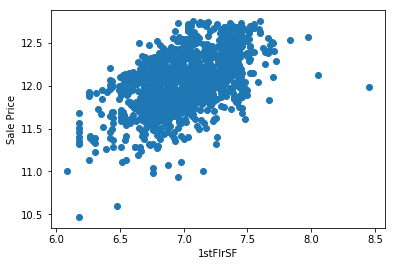

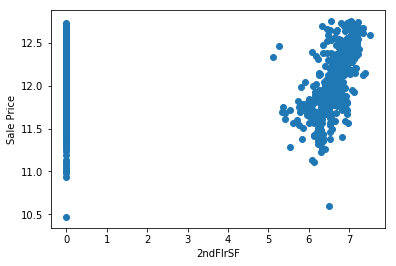

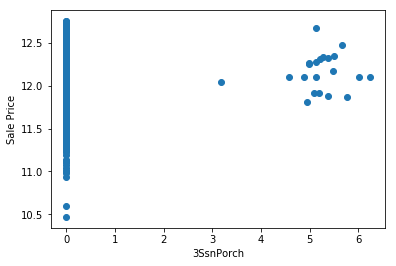

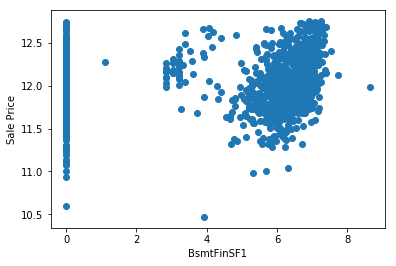

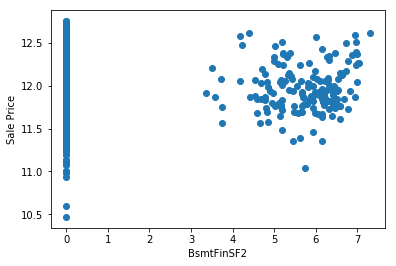

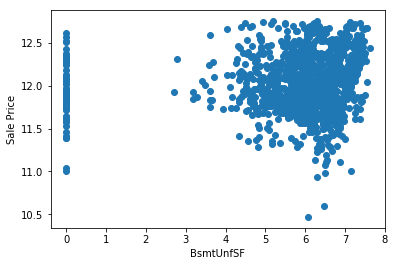

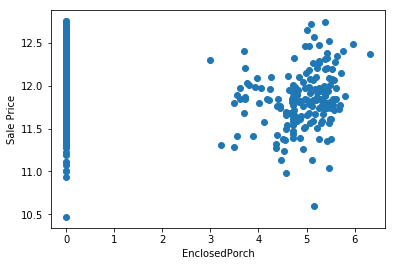

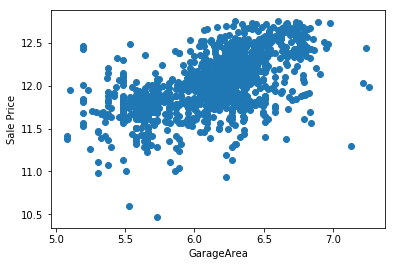

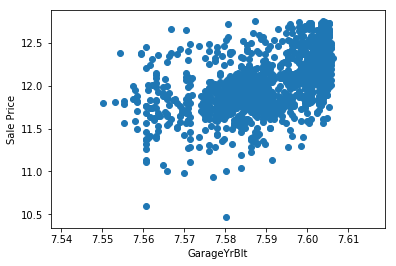

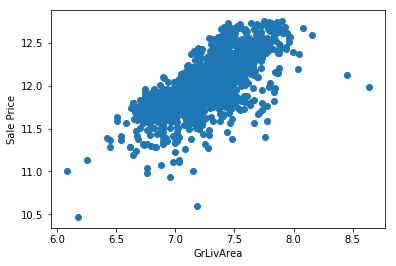

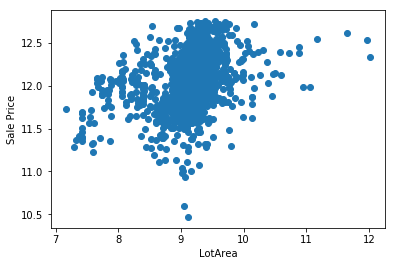

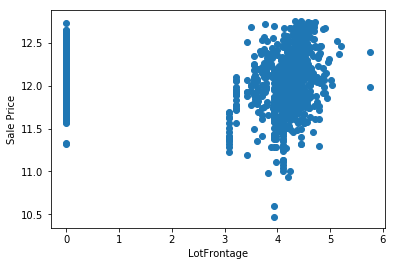

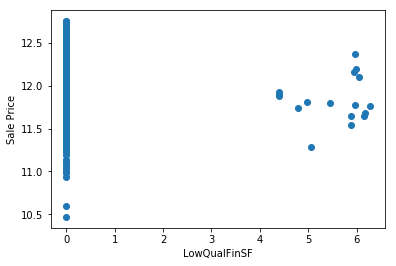

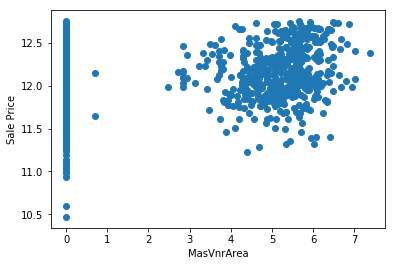

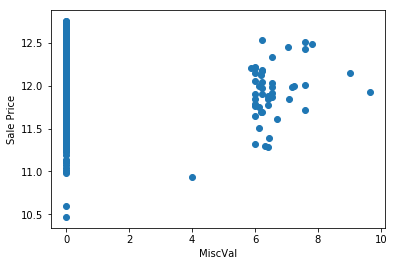

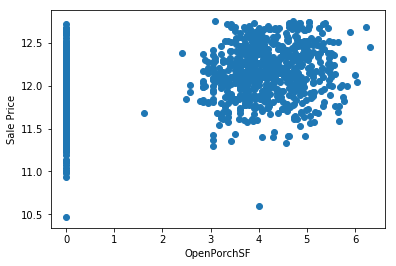

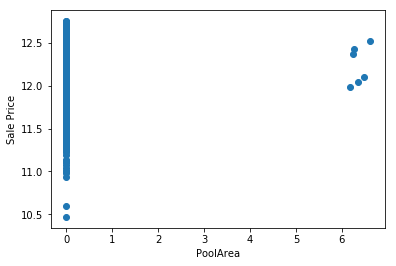

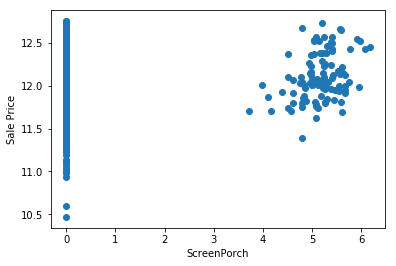

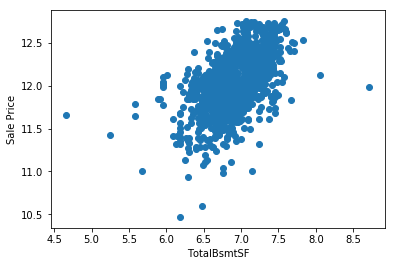

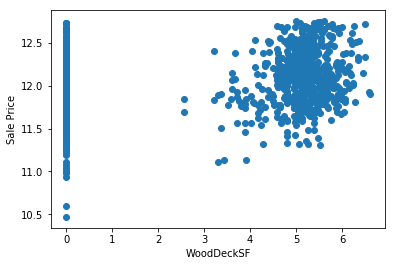

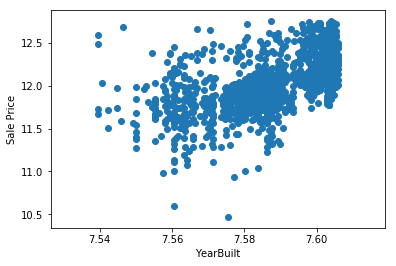

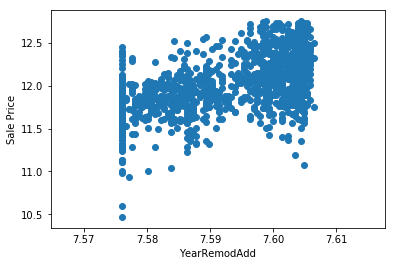

In [39]:
for item in con_col:
    plt.scatter(x=df_miss[item],y=df_miss['SalePrice'])
    plt.xlabel(item)
    plt.ylabel('Sale Price')
    plt.show()

### Remove Outliers - continuous variables

In [40]:
df_out=pd.DataFrame()
df_out=df_miss

In [41]:
df_out=df_out.drop(df_out[df_out['1stFlrSF']>8.0].index)

In [42]:
df_out=df_out.drop(df_out[(df_out['2ndFlrSF']>6.0)&(df_out['SalePrice']<11.0)].index)

In [43]:
df_out=df_out.drop(df_out[(df_out['2ndFlrSF']<5.5)&(df_out['SalePrice']>12.0)].index)

In [44]:
df_out=df_out.drop(df_out[(df_out['2ndFlrSF']==0.0)&(df_out['SalePrice']<10.6)].index)

In [45]:
df_out=df_out.drop(df_out[(df_out['3SsnPorch']==0.0)&(df_out['SalePrice']<10.7)].index)

In [46]:
df_out=df_out.drop(df_out[(df_out['BsmtFinSF1']==0.0)&(df_out['SalePrice']<10.7)].index)

In [47]:
df_out=df_out.drop(df_out[(df_out['BsmtFinSF1']>0.0)&(df_out['BsmtFinSF1']<2.0)].index)

In [48]:
df_out=df_out.drop(df_out[df_out['BsmtFinSF1']>8].index)

In [49]:
df_out=df_out.drop(df_out[(df_out['BsmtFinSF2']==0.0)&(df_out['SalePrice']<10.75)].index)

In [50]:
df_out=df_out.drop(df_out[(df_out['EnclosedPorch']==0.0)&(df_out['SalePrice']<10.75)].index)

In [51]:
df_out=df_out.drop(df_out[(df_out['GarageArea']>7.0)].index)

In [52]:
df_out=df_out.drop(df_out[(df_out['GarageArea']>5.0)&(df_out['GarageArea']<6.0)&(df_out['SalePrice']<10.75)].index)

In [53]:
df_out=df_out.drop(df_out[(df_out['GarageYrBlt']>7.55)&(df_out['GarageYrBlt']<7.60)&(df_out['SalePrice']<10.75)].index)

In [54]:
df_out=df_out.drop(df_out[(df_out['GrLivArea']>6.0)&(df_out['GrLivArea']<7.5)&(df_out['SalePrice']<10.75)].index)

In [55]:
df_out=df_out.drop(df_out[(df_out['GrLivArea']>8.25)].index)

In [56]:
df_out=df_out.drop(df_out[(df_out['LotArea']>8)&(df_out['LotArea']<10)&(df_out['SalePrice']<10.75)].index)

In [57]:
df_out=df_out.drop(df_out[(df_out['LotFrontage']==0)&(df_out['SalePrice']<10.5)].index)

In [58]:
df_out=df_out.drop(df_out[(df_out['MasVnrArea']==0)&(df_out['SalePrice']<10.75)].index)

In [59]:
df_out=df_out.drop(df_out[(df_out['MiscVal']==0)&(df_out['SalePrice']<10.75)].index)

In [60]:
df_out=df_out.drop(df_out[(df_out['OpenPorchSF']==0)&(df_out['SalePrice']<10.75)].index)

In [61]:
df_out=df_out.drop(df_out[(df_out['OpenPorchSF']>3)&(df_out['OpenPorchSF']<5)&(df_out['SalePrice']<10.75)].index)

In [62]:
df_out=df_out.drop(df_out[(df_out['PoolArea']==0)&(df_out['SalePrice']<10.75)].index)

In [63]:
df_out=df_out.drop(df_out[(df_out['ScreenPorch']==0)&(df_out['SalePrice']<10.75)].index)

In [64]:
df_out=df_out.drop(df_out[df_out['TotalBsmtSF']>8.5].index)

In [65]:
df_out=df_out.drop(df_out[df_out['TotalBsmtSF']<5.0].index)

In [66]:
df_out=df_out.drop(df_out[(df_out['WoodDeckSF']==0)&(df_out['SalePrice']<10.75)].index)

## Check the scatter plot again

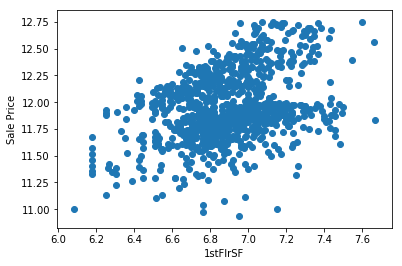

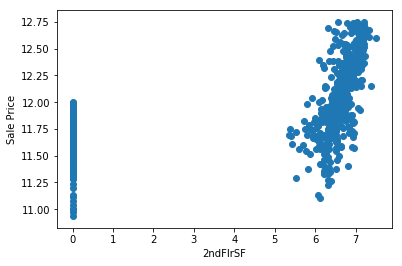

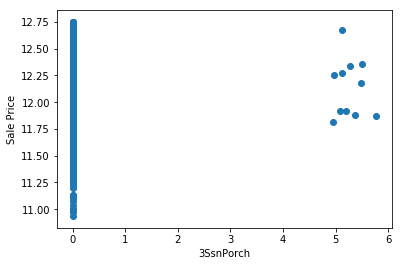

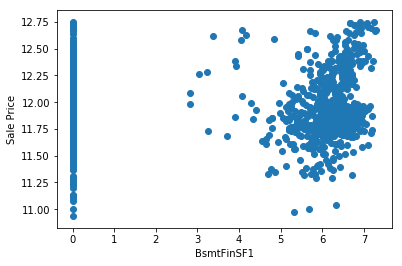

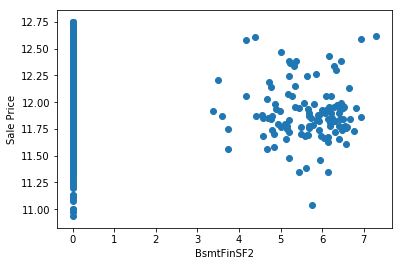

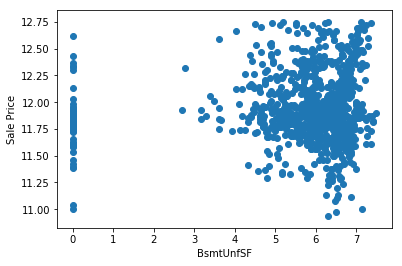

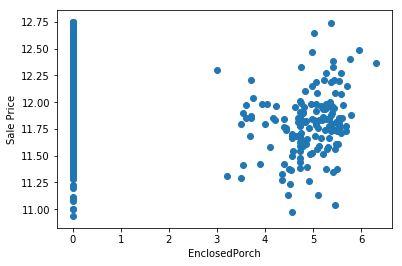

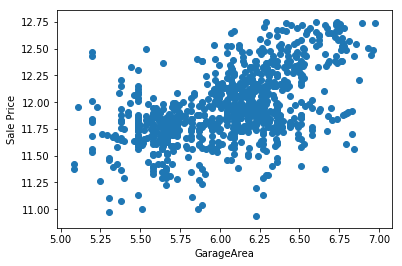

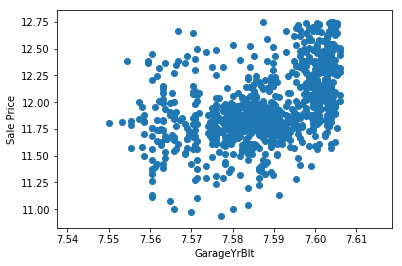

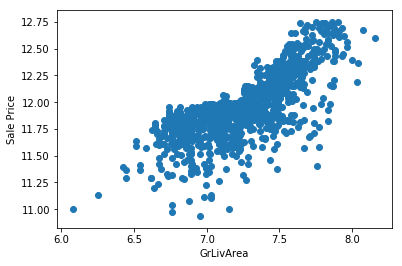

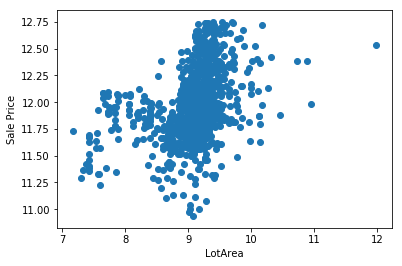

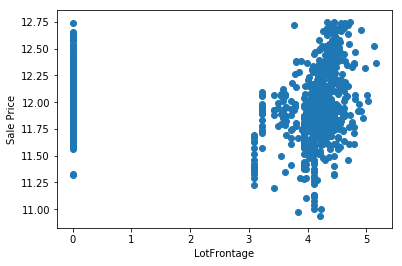

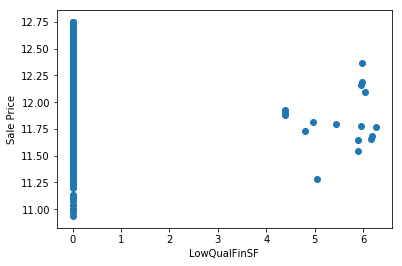

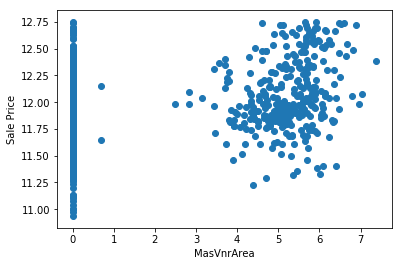

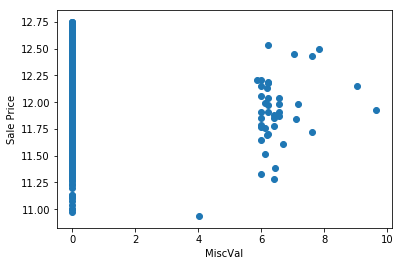

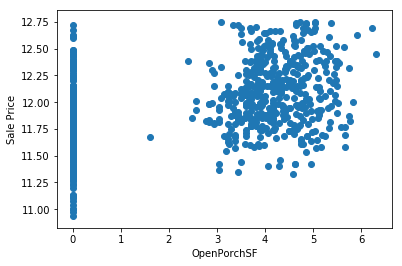

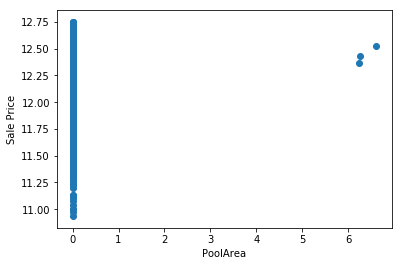

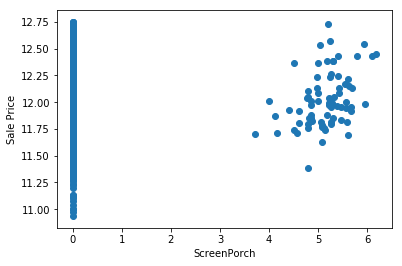

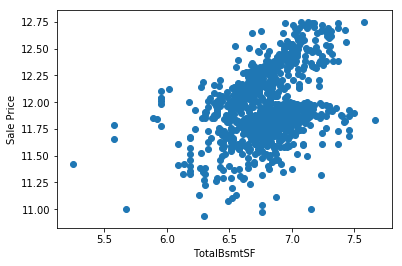

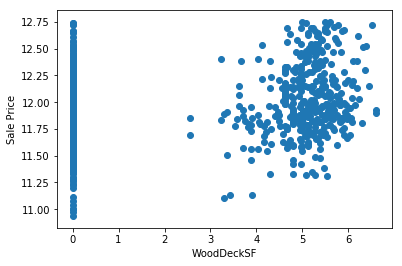

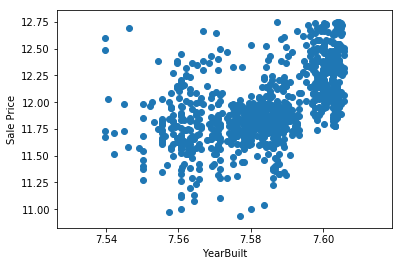

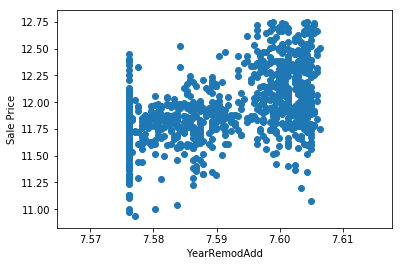

In [67]:
for item in con_col:
    plt.scatter(x=df_out[item],y=df_out['SalePrice'])
    plt.xlabel(item)
    plt.ylabel('Sale Price')
    plt.show()

In [68]:
df_out.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,6.753438,6.751101,0.000000,1.386294,1.609438,1.098612,0.000000,6.561031,0.0,1.791759,1.386294,0.693147,0.0,1.098612,5.017280,0.693147,1.609438,1.609438,1.609438,0.000000,1.098612,1.098612,2.397895,2.564949,0.693147,0.000000,1.609438,1.098612,1.791759,6.308098,1.098612,1.609438,0.693147,1.098612,1.609438,7.602900,7.444833,0.693147,1.386294,1.609438,1.945910,0.693147,1.098612,0.693147,0.0,9.042040,0.000000,4.189655,0.000000,0.0,4.110874,1.386294,5.283204,1.098612,0.000000,1.098612,2.833213,4.127134,1.791759,2.079442,1.098612,0.0,0.0,1.386294,0.693147,1.609438,12.247699,1.609438,0.0,0.693147,2.197225,6.753438,0.693147,0.000000,7.602900,7.602900,7.605392
2,6.825460,6.765039,0.000000,1.386294,1.609438,1.098612,0.693147,6.188264,0.0,1.791759,1.386294,0.693147,0.0,1.098612,6.075346,0.693147,1.609438,1.609438,1.609438,0.000000,1.098612,1.098612,2.397895,2.564949,1.386294,0.693147,1.609438,1.098612,1.791759,6.411818,1.098612,1.609438,0.693147,1.098612,1.609438,7.601902,7.488294,0.693147,1.386294,1.609438,1.945910,0.693147,1.098612,0.693147,0.0,9.328212,0.000000,4.234107,0.693147,0.0,4.110874,1.386294,5.093750,1.098612,0.000000,2.302585,2.833213,3.761200,1.791759,2.079442,1.098612,0.0,0.0,1.386294,0.693147,1.609438,12.317171,1.609438,0.0,0.693147,1.945910,6.825460,0.693147,0.000000,7.601902,7.602401,7.605392
3,6.869014,6.629363,0.000000,1.386294,1.609438,1.386294,0.000000,5.379897,0.0,1.386294,1.386294,0.693147,0.0,0.693147,6.293419,0.693147,1.609438,1.609438,1.609438,5.609472,1.098612,0.693147,1.609438,2.197225,1.609438,0.693147,0.000000,0.693147,1.791759,6.466145,1.386294,1.609438,0.000000,1.098612,0.693147,7.600402,7.448916,0.000000,1.386294,1.386294,1.945910,0.693147,1.098612,0.693147,0.0,9.164401,1.098612,4.110874,0.693147,0.0,4.262680,1.386294,0.000000,0.693147,0.000000,1.098612,2.890372,3.583519,1.791759,2.079442,1.098612,0.0,0.0,1.386294,0.693147,1.098612,11.849405,1.609438,0.0,0.693147,2.079442,6.629363,0.693147,0.000000,7.557995,7.586296,7.604396
4,7.044033,6.960348,0.000000,1.609438,1.609438,1.098612,1.098612,6.486161,0.0,1.791759,1.386294,0.693147,0.0,1.098612,6.196444,0.693147,1.609438,1.609438,1.609438,0.000000,1.098612,1.098612,2.397895,2.564949,1.386294,0.693147,1.609438,1.098612,1.791759,6.729824,1.386294,1.609438,0.693147,1.098612,1.609438,7.601402,7.695758,0.693147,1.386294,1.609438,1.945910,0.693147,1.098612,0.693147,0.0,9.565284,0.693147,4.442651,0.693147,0.0,4.110874,1.386294,5.860786,1.098612,0.000000,2.564949,3.218876,4.442651,1.791759,2.197225,1.098612,0.0,0.0,1.386294,0.693147,1.609438,12.429220,1.609438,0.0,0.693147,2.302585,7.044033,0.693147,5.262690,7.601402,7.601402,7.605392
5,6.680855,6.340359,5.771441,0.693147,1.609438,1.098612,0.000000,6.597146,0.0,1.791759,1.386294,0.693147,0.0,1.098612,4.174387,0.693147,1.609438,1.609438,1.609438,0.000000,1.098612,0.693147,2.397895,2.564949,0.693147,0.000000,1.386294,0.693147,1.791759,6.175867,1.098612,1.609438,0.000000,1.098612,1.609438,7.597898,7.217443,0.693147,1.386294,1.609438,1.098612,0.693147,0.693147,0.693147,0.0,9.555064,0.000000,4.454347,0.693147,0.0,3.931826,1.386294,0.000000,0.693147,6.552508,2.397895,2.484907,3.433987,1.791759,1.791759,1.098

## Standardize all the features

In [69]:
scaler=StandardScaler()
array_out=scaler.fit_transform(df_out)

In [70]:
values=array_out
col=df_out.columns
df_out=pd.DataFrame(data=values,columns=col)

In [71]:
df_out.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,-0.564577,0.882776,-0.107551,0.164250,0.316405,0.041879,-0.538015,0.816706,-0.37369,0.896716,0.250804,1.315657,-0.253578,0.948216,-0.406040,0.255896,0.286087,0.079845,0.270448,-0.441754,0.340629,1.515444,1.093182,1.069903,-0.902884,-0.928332,1.203286,0.998244,0.212267,0.680751,0.571990,0.210226,0.669321,0.168964,0.742124,1.196067,0.597989,1.031778,0.108766,0.944255,0.65557,-0.196058,1.054724,0.056784,-0.220494,-0.047869,-0.604836,0.478541,-0.670640,-0.133273,0.301846,0.338263,1.386157,1.174734,-0.209215,-1.975962,0.845902,0.949388,-0.581501,1.010784,0.27536,-0.055969,-0.05407,-0.006541,-0.412709,0.251905,0.939044,0.048023,-0.287748,0.045691,0.964137,-0.166600,0.032292,-0.862543,1.247633,1.042233,0.147938
1,-0.271796,0.887029,-0.107551,0.164250,0.316405,0.041879,1.002949,0.689248,-0.37369,0.896716,0.250804,1.315657,-0.253578,0.948216,0.241914,0.255896,0.286087,0.079845,0.270448,-0.441754,0.340629,1.515444,1.093182,1.069903,0.807684,0.854591,1.203286,0.998244,0.212267,0.960020,0.571990,0.210226,0.669321,0.168964,0.742124,1.117254,0.728160,1.031778,0.108766,0.944255,0.65557,-0.196058,1.054724,0.056784,-0.220494,0.535022,-0.604836,0.505397,1.212272,-0.133273,0.301846,0.338263,1.310941,1.174734,-0.209215,0.945175,0.845902,0.779844,-0.581501,1.010784,0.27536,-0.055969,-0.05407,-0.006541,-0.412709,0.251905,1.155682,0.048023,-0.287748,0.045691,-0.200947,0.095933,0.032292,-0.862543,1.181697,0.994487,0.147938
2,-0.094740,0.845629,-0.107551,0.164250,0.316405,2.803505,-0.538015,0.412846,-0.37369,0.190939,0.250804,1.315657,-0.253578,-0.580602,0.375461,0.255896,0.286087,0.079845,0.270448,2.613359,0.340629,-0.553155,-0.826402,0.327629,1.358364,0.854591,-1.687706,-0.864420,0.212267,1.106296,1.861071,0.210226,-0.863487,0.168964,-1.231986,0.998887,0.610217,-0.940085,0.108766,0.082517,0.65557,-0.196058,1.054724,0.056784,-0.220494,0.201363,1.429692,0.430945,1.212272,-0.133273,0.541342,0.338263,-0.711371,-0.582750,-0.209215,-1.975962,0.934410,0.697521,-0.581501,1.010784,0.27536,-0.055969,-0.05407,-0.006541,-0.412709,-2.517505,-0.302974,0.048023,-0.287748,0.045691,0.418099,-0.618875,0.032292,-0.862543,-1.717694,-0.546116,-1.352225
3,0.616737,0.946625,-0.107551,1.204122,0.316405,0.041879,1.904356,0.791106,-0.37369,0.896716,0.250804,1.315657,-0.253578,0.948216,0.316074,0.255896,0.286087,0.079845,0.270448,-0.441754,0.340629,1.515444,1.093182,1.069903,0.807684,0.854591,1.203286,0.998244,0.212267,1.816261,1.861071,0.210226,0.669321,0.168964,0.742124,1.077818,1.349552,1.031778,0.108766,0.944255,0.65557,-0.196058,1.054724,0.056784,-0.220494,1.017901,0.678808,0.631392,1.212272,-0.133273,0.301846,0.338263,1.615468,1.174734,-0.209215,1.581736,1.443088,1.095572,-0.581501,1.713705,0.27536,-0.055969,-0.05407,-0.006541,-0.412709,0.251905,1.505090,0.048023,-0.287748,0.045691,1.452584,0.892671,0.032292,1.196246,1.148704,0.898923,0.147938
4,-0.859639,0.757443,10.185294,-3.065884,0.316405,0.041879,-0.538015,0.829054,-0.37369,0.896716,0.250804,1.315657,-0.253578,0.948216,-0.922223,0.255896,0.286087,0.079845,0.270448,-0.441754,0.340629,-0.553155,1.093182,1.069903,-0.902884,-0.928332,0.802459,-0.864420,0.212267,0.324714,0.571990,0.210226,-0.863487,0.1689

In [72]:
df_out['SalePrice'].isnull().sum()

0

In [73]:
df_out.describe().T

,count,mean,std,min,25%,50%,75%,max
1stFlrSF,960.0,-7.660539e-16,1.000521,-3.283916,-0.607494,-0.011092,0.616737,3.149838
2ndFlrSF,960.0,-8.974303e-17,1.000521,-1.177238,-1.177238,0.746486,0.865618,1.113137
3SsnPorch,960.0,3.330669e-17,1.000521,-0.107551,-0.107551,-0.107551,-0.107551,10.185294
BedroomAbvGr,960.0,-3.478699e-16,1.000521,-6.296019,0.164250,0.164250,0.164250,2.772116
BldgType,960.0,8.428443e-16,1.000521,-5.230099,0.316405,0.316405,0.316405,0.316405
BsmtCond,960.0,1.451617e-15,1.000521,-10.504333,0.041879,0.041879,0.041879,2.803505
BsmtExposure,960.0,1.480297e-17,1.000521,-0.538015,-0.538015,-0.538015,-0.538015,2.543914
BsmtFinSF1,960.0,-5.736152e-17,1.000521,-1.426676,-1.426676,0.591115,0.777956,1.067223
BsmtFinSF2,960.0,-8.789266e-17,1.000521,-0.373690,-0.373690,-0.373690,-0.373690,3.495356
BsmtFinType1,960.0,5.218048e-16,1.000521,-2.222128,-0.309817,0.579356,0.579356,0.896716


## Feature Selection

### 1. Filter Method - Correlation Coefficient

In [74]:
corr=df_out.corr()
corr.sort_values(["SalePrice"],ascending=False,inplace=True)
dc=corr.SalePrice

In [75]:
dc

SalePrice        1.000000
GrLivArea        0.748363
OverallQual      0.734979
Neighborhood     0.623216
ExterQual        0.606335
FullBath         0.599774
TotRmsAbvGrd     0.596296
GarageCars       0.564219
HalfBath         0.553845
KitchenQual      0.553735
BsmtQual         0.546506
2ndFlrSF         0.530782
GarageArea       0.520568
YearRemodAdd     0.511180
GarageFinish     0.508524
YearBuilt        0.507683
FireplaceQu      0.486192
Fireplaces       0.474302
OpenPorchSF      0.470971
Foundation       0.469178
GarageYrBlt      0.459985
GarageType       0.450240
HeatingQC        0.420561
MSZoning         0.396955
BedroomAbvGr     0.392467
LotArea          0.378546
Exterior1st      0.372626
1stFlrSF         0.361227
TotalBsmtSF      0.356014
Exterior2nd      0.349757
                   ...   
BsmtExposure     0.157282
Functional       0.125318
LotConfig        0.124689
ExterCond        0.119644
Condition2       0.114200
BsmtFullBath     0.104627
BsmtFinType2     0.099223
LandContour 

In [76]:
dc.index

Index(['SalePrice', 'GrLivArea', 'OverallQual', 'Neighborhood', 'ExterQual',
       'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'HalfBath', 'KitchenQual',
       'BsmtQual', '2ndFlrSF', 'GarageArea', 'YearRemodAdd', 'GarageFinish',
       'YearBuilt', 'FireplaceQu', 'Fireplaces', 'OpenPorchSF', 'Foundation',
       'GarageYrBlt', 'GarageType', 'HeatingQC', 'MSZoning', 'BedroomAbvGr',
       'LotArea', 'Exterior1st', '1stFlrSF', 'TotalBsmtSF', 'Exterior2nd',
       'HouseStyle', 'MasVnrArea', 'LotShape', 'MasVnrType', 'WoodDeckSF',
       'CentralAir', 'BsmtFinType1', 'Electrical', 'BsmtCond', 'SaleType',
       'GarageQual', 'SaleCondition', 'MSSubClass', 'GarageCond', 'PavedDrive',
       'Condition1', 'BldgType', 'BsmtExposure', 'Functional', 'LotConfig',
       'ExterCond', 'Condition2', 'BsmtFullBath', 'BsmtFinType2',
       'LandContour', 'Street', 'BsmtUnfSF', 'MoSold', 'PoolArea', 'PoolQC',
       'ScreenPorch', 'Heating', 'BsmtFinSF1', '3SsnPorch', 'RoofMatl',
       'LandSlope',

In [77]:
dc.values

array([ 1.        ,  0.74836303,  0.73497909,  0.6232164 ,  0.60633451,
        0.59977376,  0.59629634,  0.56421859,  0.55384543,  0.55373503,
        0.54650641,  0.53078187,  0.52056849,  0.51117962,  0.50852449,
        0.5076834 ,  0.48619198,  0.47430201,  0.47097078,  0.46917766,
        0.45998465,  0.45023972,  0.42056115,  0.39695468,  0.3924674 ,
        0.37854606,  0.37262607,  0.36122721,  0.35601413,  0.34975696,
        0.29510875,  0.29267427,  0.28771405,  0.28313867,  0.27280296,
        0.26178961,  0.24967241,  0.24822506,  0.23559592,  0.23282079,
        0.21263698,  0.21049015,  0.20797004,  0.19729925,  0.19511275,
        0.17880903,  0.1761496 ,  0.15728214,  0.12531848,  0.12468927,
        0.1196443 ,  0.11419967,  0.10462739,  0.09922339,  0.09793797,
        0.09630864,  0.09089385,  0.09049609,  0.08645701,  0.08032973,
        0.07920947,  0.07734682,  0.07653677,  0.06252038,  0.03499565,
        0.02855998,  0.02840433,  0.01159794, -0.00115547, -0.00

In [78]:
dc.index.values

array(['SalePrice', 'GrLivArea', 'OverallQual', 'Neighborhood',
       'ExterQual', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'HalfBath',
       'KitchenQual', 'BsmtQual', '2ndFlrSF', 'GarageArea',
       'YearRemodAdd', 'GarageFinish', 'YearBuilt', 'FireplaceQu',
       'Fireplaces', 'OpenPorchSF', 'Foundation', 'GarageYrBlt',
       'GarageType', 'HeatingQC', 'MSZoning', 'BedroomAbvGr', 'LotArea',
       'Exterior1st', '1stFlrSF', 'TotalBsmtSF', 'Exterior2nd',
       'HouseStyle', 'MasVnrArea', 'LotShape', 'MasVnrType', 'WoodDeckSF',
       'CentralAir', 'BsmtFinType1', 'Electrical', 'BsmtCond', 'SaleType',
       'GarageQual', 'SaleCondition', 'MSSubClass', 'GarageCond',
       'PavedDrive', 'Condition1', 'BldgType', 'BsmtExposure',
       'Functional', 'LotConfig', 'ExterCond', 'Condition2',
       'BsmtFullBath', 'BsmtFinType2', 'LandContour', 'Street',
       'BsmtUnfSF', 'MoSold', 'PoolArea', 'PoolQC', 'ScreenPorch',
       'Heating', 'BsmtFinSF1', '3SsnPorch', 'RoofMatl', 'Land

### Select the features with more than 0.5 of correleation coefficient

In [79]:
dc_new=dc[(dc.values>0.5)&(dc.values<1)]
dc_new

GrLivArea       0.748363
OverallQual     0.734979
Neighborhood    0.623216
ExterQual       0.606335
FullBath        0.599774
TotRmsAbvGrd    0.596296
GarageCars      0.564219
HalfBath        0.553845
KitchenQual     0.553735
BsmtQual        0.546506
2ndFlrSF        0.530782
GarageArea      0.520568
YearRemodAdd    0.511180
GarageFinish    0.508524
YearBuilt       0.507683
Name: SalePrice, dtype: float64

In [80]:
len(dc_new)

15

In [81]:
feature_col=dc_new.index.values
feature_col

array(['GrLivArea', 'OverallQual', 'Neighborhood', 'ExterQual',
       'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'HalfBath',
       'KitchenQual', 'BsmtQual', '2ndFlrSF', 'GarageArea',
       'YearRemodAdd', 'GarageFinish', 'YearBuilt'], dtype=object)

### Select the features to be used in the data analysis

In [82]:
X=df_out[sorted(feature_col)]
y=df_out['SalePrice']

## Modeling

### Create a Result dataframe to show the result in the end

In [125]:
result_index=['Ridge Regression','LASSO Regression','Elastic Net',
                     'Decision Tree','Random Forest','XGBoost']
result_col=['Corr-Time','Corr-Fea','Corr-RMSE',
            'Recur-Time','Recur-Fea','Recur-RMSE',
            'XGB-Time','XGB-Fea','XGB-RMSE',]

result=pd.DataFrame(index=result_index, columns=result_col)


In [126]:
result

,Corr-Time,Corr-Fea,Corr-RMSE,Recur-Time,Recur-Fea,Recur-RMSE,XGB-Time,XGB-Fea,XGB-RMSE
Ridge Regression,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LASSO Regression,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Elastic Net,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Decision Tree,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Random Forest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
XGBoost,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Adjust the figure size for appropriate display

In [85]:
print(plt.rcParams["figure.figsize"])
plt.rcParams["figure.figsize"] = (8,4)

[6.0, 4.0]


### Ridge Regression

In [108]:
i=0
start=timeit.default_timer()
RR=Ridge(alpha=0.001,fit_intercept=True)
y_pred=cross_val_predict(RR,X,y,cv=4)
stop=timeit.default_timer()
result['Corr-Time'][i]=stop-start
print(result['Corr-Time'][i])

0.0228511029999936


In [ ]:
result['Corr-Fea'][i]=len(X.columns)
print(result['Corr-Fea'][i])

In [ ]:
result['Corr-RMSE'][i]=np.sqrt(mean_squared_error(y_pred,y))
result['Corr-RMSE'][i]

15


0.4332804835325762

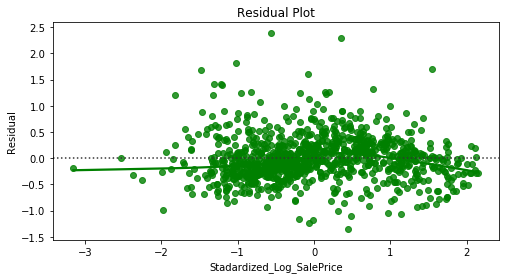

In [109]:
y_err=y_pred-y
sns.residplot(y_pred,y_err,lowess=True,color="g")
plt.xlabel('Stadardized_Log_SalePrice')
plt.ylabel('Residual')
plt.title('Residual Plot')

### Lasso Regression

In [110]:
i=1
start=timeit.default_timer()
LR=Lasso(alpha=0.0001,fit_intercept=True)
y_pred=cross_val_predict(LR,X,y,cv=4)
stop=timeit.default_timer()
result['Corr-Time'][i]=stop-start
print(result['Corr-Time'][i])

0.0205457499998829


In [ ]:
result['Corr-Fea'][1]=len(X.columns)
print(result['Corr-Fea'][i])

In [ ]:
result['Corr-RMSE'][i]=np.sqrt(mean_squared_error(y_pred,y))
result['Corr-RMSE'][i]

15


0.43326942364251236

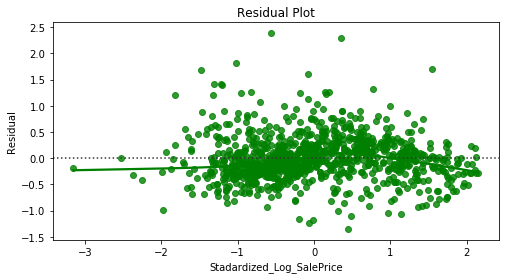

In [111]:
y_err=y_pred-y
sns.residplot(y_pred,y_err,lowess=True,color="g")
plt.xlabel('Stadardized_Log_SalePrice')
plt.ylabel('Residual')
plt.title('Residual Plot')

### Elastic Net Model

In [112]:
i=2
start=timeit.default_timer()
EN = ElasticNet(alpha=0.0001,fit_intercept=True,max_iter=50000,tol=0.0001)
y_pred=cross_val_predict(EN,X,y,cv=4)
stop=timeit.default_timer()
result['Corr-Time'][i]=stop-start
print(result['Corr-Time'][i])

0.02044035700009772


In [ ]:
result['Corr-Fea'][i]=len(X.columns)
print(result['Corr-Fea'][i])

In [ ]:
result['Corr-RMSE'][i]=np.sqrt(mean_squared_error(y_pred,y))
result['Corr-RMSE'][i]

15


0.43327294279918227

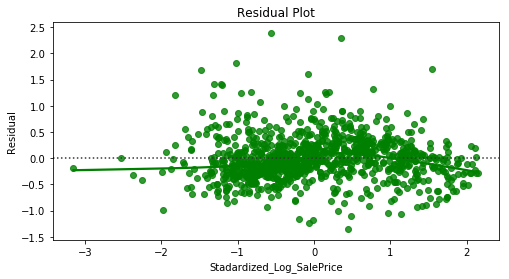

In [113]:
y_err=y_pred-y
sns.residplot(y_pred,y_err,lowess=True,color="g")
plt.xlabel('Stadardized_Log_SalePrice')
plt.ylabel('Residual')
plt.title('Residual Plot')

### Decision Tree Model

In [114]:
i=3
start=timeit.default_timer()
DT=DecisionTreeRegressor()
y_pred=cross_val_predict(DT,X,y,cv=4)
stop=timeit.default_timer()
result['Corr-Time'][i]=stop-start
print(result['Corr-Time'][i])

0.039520863999996436


In [ ]:
result['Corr-Fea'][i]=len(X.columns)
print(result['Corr-Fea'][i])

In [ ]:
result['Corr-RMSE'][i]=np.sqrt(mean_squared_error(y_pred,y))
result['Corr-RMSE'][i]

15


0.6282732611972974

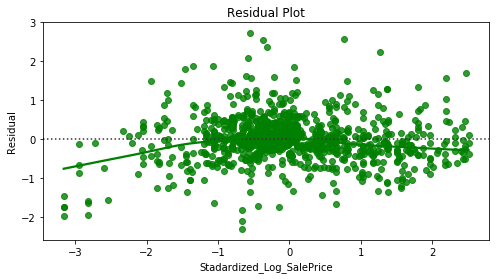

In [115]:
y_err=y_pred-y
sns.residplot(y_pred,y_err,lowess=True,color="g")
plt.xlabel('Stadardized_Log_SalePrice')
plt.ylabel('Residual')
plt.title('Residual Plot')

### Random Forest Model

In [116]:
i=4
start=timeit.default_timer()
RF = ensemble.RandomForestRegressor(n_estimators=100, random_state=0)
y_pred=cross_val_predict(RF,X,y,cv=4)
stop=timeit.default_timer()
result['Corr-Time'][i]=stop-start
print(result['Corr-Time'][i])

1.4410181439998269


In [ ]:
result['Corr-Fea'][i]=len(X.columns)
print(result['Corr-Fea'][i])

In [ ]:
result['Corr-RMSE'][i]=np.sqrt(mean_squared_error(y_pred,y))
result['Corr-RMSE'][i]

15


0.4257089814183621

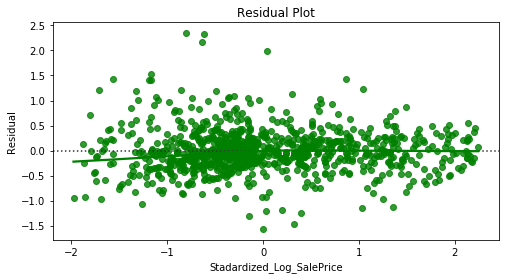

In [117]:
y_err=y_pred-y
sns.residplot(y_pred,y_err,lowess=True,color="g")
plt.xlabel('Stadardized_Log_SalePrice')
plt.ylabel('Residual')
plt.title('Residual Plot')

### XGBoost Model

In [118]:
i=5
start=timeit.default_timer()
XG = ensemble.GradientBoostingRegressor(loss='huber', learning_rate=0.05, n_estimators=3000, max_depth=10, 
                                  max_features='sqrt', min_samples_leaf=15, 
                                  min_samples_split=10)
y_pred=cross_val_predict(XG,X,y,cv=4)
stop=timeit.default_timer()
result['Corr-Time'][5]=stop-start
print(result['Corr-Time'][i])

61.83618645599995


In [ ]:
result['Corr-Fea'][5]=len(X.columns)
print(result['Corr-Fea'][i])

In [ ]:
result['Corr-RMSE'][i]=np.sqrt(mean_squared_error(y_pred,y))
result['Corr-RMSE'][i]

15


0.4354940802122395

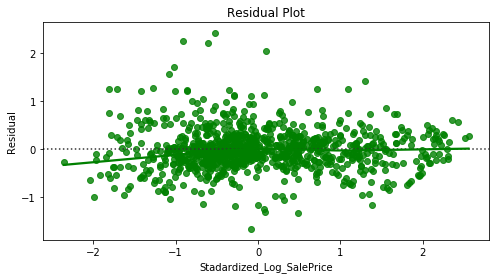

In [107]:
y_err=y_pred-y
sns.residplot(y_pred,y_err,lowess=True,color="g")
plt.xlabel('Stadardized_Log_SalePrice')
plt.ylabel('Residual')
plt.title('Residual Plot')

### Wrapper Method - Recursive Feature Elimination Method

### Select the features to be used in the feature emlimination

In [ ]:
X=df_out.drop(columns=['SalePrice'])
y=df_out['SalePrice']

### Ridge Regression

In [119]:
i=0
start=timeit.default_timer()
RR=Ridge(alpha=0.001,fit_intercept=True)
RM_RR=RFECV(RR, step=1, cv=4, scoring='neg_mean_squared_error')
RM_RR.fit(X,y)
y_pred=RM_RR.predict(X)
stop=timeit.default_timer()
result['Recur-Time'][1]=stop-start
print(result['Recur-Time'][i])

0.10072778999983711


In [120]:
result['Recur-Fea'][i]=RM_RR.n_features_
print(result['Recur-Fea'][i])

14


In [123]:
y_err=y_pred-y
result['Recur-RMSE'][i]=np.sqrt(mean_squared_error(y_pred,y))
result['Recur-RMSE'][i]

0.4229424743117691

Text(0.5,1,'Residual Plot')

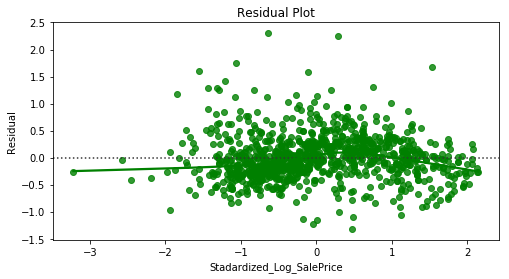

In [124]:
sns.residplot(y_pred,y_err,lowess=True,color="g")
plt.xlabel('Stadardized_Log_SalePrice')
plt.ylabel('Residual')
plt.title('Residual Plot')

### Lasso Regression

In [127]:
i=1
start=timeit.default_timer()
LR=Lasso(alpha=0.001,fit_intercept=True)
RM_LR=RFECV(LR, step=1, cv=4, scoring='neg_mean_squared_error')
RM_LR.fit(X,y)
y_pred=RM_LR.predict(X)
stop=timeit.default_timer()
result['Recur-Time'][1]=stop-start
print(result['Recur-Time'][i])

0.1353472599998895


In [128]:
result['Recur-Fea'][1]=RM_LR.n_features_
print(result['Recur-Fea'][i])

14


In [129]:
y_err=y_pred-y
result['Recur-RMSE'][i]=np.sqrt(mean_squared_error(y_pred,y))
result['Recur-RMSE'][i]

0.42296321881913457

Text(0.5,1,'Residual Plot')

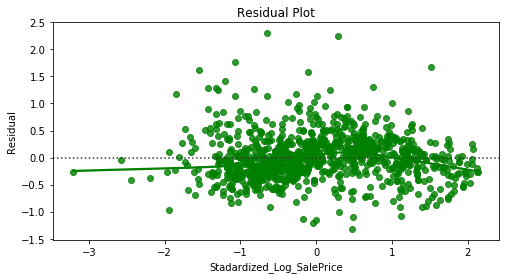

In [130]:
sns.residplot(y_pred,y_err,lowess=True,color="g")
plt.xlabel('Stadardized_Log_SalePrice')
plt.ylabel('Residual')
plt.title('Residual Plot')

### Elastic Net Model

In [133]:
i=2
start=timeit.default_timer()
EN = ElasticNet(alpha=0.0001,fit_intercept=True,max_iter=50000,tol=0.0001)
RM_EN=RFECV(EN, step=1, cv=4, scoring='neg_mean_squared_error')
RM_EN.fit(X,y)
y_pred=RM_EN.predict(X)
stop=timeit.default_timer()
result['Recur-Time'][i]=stop-start
print(result['Recur-Time'][i])

0.141122625999742


In [134]:
result['Recur-Fea'][i]=RM_EN.n_features_
print(result['Recur-Fea'][i])

14


In [135]:
y_err=y_pred-y
result['Recur-RMSE'][i]=np.sqrt(mean_squared_error(y_pred,y))
result['Recur-RMSE'][i]

0.42294254619401556

Text(0.5,1,'Residual Plot')

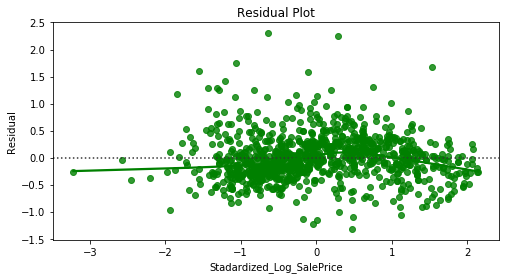

In [136]:
sns.residplot(y_pred,y_err,lowess=True,color="g")
plt.xlabel('Stadardized_Log_SalePrice')
plt.ylabel('Residual')
plt.title('Residual Plot')

### Decision Tree Model

In [ ]:
i=3
start=timeit.default_timer()
DT=DecisionTreeRegressor()
RM_DT=RFECV(DT, step=1, cv=4, scoring='neg_mean_squared_error')
RM_DT.fit(X,y)
y_pred=RM_DT.predict(X)
stop=timeit.default_timer()
result['Recur-Time'][i]=stop-start
print(result['Recur-Time'][i])

In [ ]:
result['Recur-Fea'][i]=RM_DT.n_features_
print(result['Recur-Fea'][i])

In [ ]:
y_err=y_pred-y
result['Recur-RMSE'][i]=np.sqrt(mean_squared_error(y_pred,y))
result['Recur-RMSE'][i]

In [ ]:
sns.residplot(y_pred,y_err,lowess=True,color="g")
plt.xlabel('Stadardized_Log_SalePrice')
plt.ylabel('Residual')
plt.title('Residual Plot')

### Random Forest Model

In [ ]:
i=4
start=timeit.default_timer()
RF = ensemble.RandomForestRegressor(n_estimators=100, random_state=0)
RM_RF=RFECV(RF, step=1, cv=4, scoring='neg_mean_squared_error')
RM_RF.fit(X,y)
y_pred=RM_RF.predict(X)
stop=timeit.default_timer()
result['Recur-Time'][i]=stop-start
print(result['Recur-Time'][i])

In [ ]:
result['Recur-Fea'][i]=RM_RR.n_features_
print(result['Recur-Fea'][i])

In [ ]:
y_err=y_pred-y
result['Recur-RMSE'][i]=np.sqrt(mean_squared_error(y_pred,y))
result['Recur-RMSE'][i]

In [ ]:
sns.residplot(y_pred,y_err,lowess=True,color="g")
plt.xlabel('Stadardized_Log_SalePrice')
plt.ylabel('Residual')
plt.title('Residual Plot')

### XGBoost Model

In [ ]:
i=5
start=timeit.default_timer()
XG = ensemble.GradientBoostingRegressor(loss='huber', learning_rate=0.05, n_estimators=300, max_depth=10, 
                                  max_features='sqrt', min_samples_leaf=15, 
                                  min_samples_split=10)
RM_XG=RFECV(XG, step=1, cv=4, scoring='neg_mean_squared_error')
RM_XG.fit(X,y)
y_pred=RM_XG.predict(X)
stop=timeit.default_timer()
result['Recur-Time'][i]=stop-start
print(result['Recur-Time'][i])

In [ ]:
result['Recur-Fea'][i]=RM_XG.n_features_
print(result['Recur-Fea'][i])

In [ ]:
y_err=y_pred-y
result['Recur-RMSE'][i]=np.sqrt(mean_squared_error(y_pred,y))
result['Recur-RMSE'][i]

In [ ]:
sns.residplot(y_pred,y_err,lowess=True,color="g")
plt.xlabel('Stadardized_Log_SalePrice')
plt.ylabel('Residual')
plt.title('Residual Plot')

## Embedded Method - XGBoost Feature Importance

### Select the features to be used in the data analysis

In [ ]:
X=df_out.drop(columns=['SalePrice'])
y=df_out['SalePrice']

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier()

In [ ]:
model.fit(X,y)
array_importance=model.feature_importances_
print(array_importance)

In [ ]:
len(model.feature_importances_)

In [ ]:
X.shape

In [ ]:
X_col=X.columns.values

In [ ]:
df_XG=pd.DataFrame()
df_XG['Features']=X_col
df_XG['Importance']=array_importance

In [ ]:
df_XG=df_XG.sort_values(by='Importance',ascending=True)
plt.rcParams["figure.figsize"] = (10,20)
plt.barh(df_XG['Features'],df_XG['Importance'])
plt.show()

In [ ]:
df_XG=df_XG.sort_values(by='Importance',ascending=False)

In [ ]:
df_XG

In [ ]:
feature_XG_col=df_XG['Features'][:12].values

In [ ]:
feature_XG_col

In [ ]:
len(feature_XG_col)

### Select the features to be used in the data analysis

In [ ]:
X=df_out[feature_XG_col]
y=df_out['SalePrice']

### Adjust figure size

In [ ]:
plt.rcParams["figure.figsize"] = (8,4)

### Ridge Regression

In [ ]:
RR=Ridge(alpha=0.001,fit_intercept=True)

In [ ]:
y_pred=cross_val_predict(RR,X,y,cv=4)
y_err=y_pred-y
sns.residplot(y_pred,y_err,lowess=True,color="g")
result['XGBoost'][0]=np.sqrt(mean_squared_error(y_pred,y))
result['XGBoost'][0]

### Lasso Regression

In [ ]:
LR=Lasso(alpha=0.0001,fit_intercept=True)

In [ ]:
y_pred=cross_val_predict(LR,X,y,cv=4)
y_err=y_pred-y
sns.residplot(y_pred,y_err,lowess=True,color="g")
result['XGBoost'][1]=np.sqrt(mean_squared_error(y_pred,y))
result['XGBoost'][1]

### Elastic Net Model

In [ ]:
EN = ElasticNet(alpha=0.0001,fit_intercept=True,max_iter=50000,tol=0.0001)

In [ ]:
y_pred=cross_val_predict(EN,X,y,cv=4)
y_err=y_pred-y
sns.residplot(y_pred,y_err,lowess=True,color="g")
result['XGBoost'][2]=np.sqrt(mean_squared_error(y_pred,y))
result['XGBoost'][2]

### Decision Tree Model

In [ ]:
DT=DecisionTreeRegressor()

In [ ]:
y_pred=cross_val_predict(DT,X,y,cv=4)
y_err=y_pred-y
sns.residplot(y_pred,y_err,lowess=True,color="g")
result['XGBoost'][3]=np.sqrt(mean_squared_error(y_pred,y))
result['XGBoost'][3]

### Random Forest Model

In [ ]:
RF = ensemble.RandomForestRegressor(n_estimators=100, random_state=0)

In [ ]:
y_pred=cross_val_predict(RF,X,y,cv=4)
y_err=y_pred-y
sns.residplot(y_pred,y_err,lowess=True,color="g")
result['XGBoost'][4]=np.sqrt(mean_squared_error(y_pred,y))
result['XGBoost'][4]

### XGBoost Model

In [ ]:
XG = ensemble.GradientBoostingRegressor(loss='huber', learning_rate=0.05, n_estimators=3000, max_depth=10, 
                                  max_features='sqrt', min_samples_leaf=15, 
                                  min_samples_split=10)

In [ ]:
y_pred=cross_val_predict(XG,X,y,cv=4)
y_err=y_pred-y
sns.residplot(y_pred,y_err,lowess=True,color="g")
result['XGBoost'][5]=np.sqrt(mean_squared_error(y_pred,y))
result['XGBoost'][5]

## Examine the result

In [ ]:
result